# Importations

In [37]:
import pandas as pd
import pickle as pk
import numpy as np
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix,precision_score,recall_score,f1_score,precision_recall_curve
from imblearn.over_sampling import SMOTE


# Préparation des données

#### Importation

In [38]:
data_prof = pd.read_csv('Data_Arbre.csv')

In [39]:
cols = data_prof.columns
# cols

Liste des différentes colonnes par type

In [40]:
categorielle = ["clc_quartier","clc_secteur","fk_stadedev","fk_port","fk_pied","fk_situation","fk_nomtech","villeca","feuillage"]
numerique = ["longitude","latitude","haut_tot","haut_tronc","tronc_diam","age_estim","fk_prec_estim","clc_nbr_diag"]
binaire = ["fk_arb_etat","remarquable"]
revet = ["fk_revetement"]
# len(categorielle)+len(numerique)+len(binaire)

In [41]:
data_num = data_prof[numerique]

#### Traitement valeur numerique -> StanardScaler

Scaler pour mettre toute les données numérique sur la même echelle

In [42]:
scaler = StandardScaler()
data_num_scaled = scaler.fit_transform(data_num)

In [43]:
# data_num_scaled = pd.DataFrame(data_num_scaled,columns=numerique)
data_num_scaled = pd.DataFrame(data_num_scaled,columns=numerique)

In [44]:
data_num_scaled

,longitude,latitude,haut_tot,haut_tronc,tronc_diam,age_estim,fk_prec_estim,clc_nbr_diag
0,-0.121047,-1.027327,-0.920963,-0.46555,-1.148795,-0.968413,-0.687534,-0.279804
1,-1.427386,0.976923,0.213100,-1.02441,0.934743,0.822235,0.357548,-0.279804
2,-0.396705,-0.642658,0.051091,0.09331,0.189412,-0.200993,0.357548,-0.279804
3,0.478338,1.012295,0.699128,0.09331,0.765349,0.822235,-1.314583,-0.279804
4,0.587422,0.692942,-1.082973,-0.46555,1.104136,0.310621,-1.314583,-0.279804
...,...,...,...,...,...,...,...,...
7404,-0.762150,-0.241781,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804
7405,-0.766702,-0.243069,-1.406991,-0.46555,-1.521460,-1.582349,-1.523599,-0.279804
7406,0.129538,0.881435,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804
7407,-0.224781,-0.307587,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804


#### Valeur catégorielle -> OneHotEncoder

OneHotEncoder pour faire une colonne pour chaque elements different des valeur catégorielle. Exemple, 1 colonne par quartier

In [45]:
hot = OneHotEncoder(sparse_output=False)
hot_df = pd.DataFrame(hot.fit_transform(data_prof[categorielle]), columns=hot.get_feature_names_out(categorielle))

In [46]:
hot_df

,clc_quartier_HARLY,clc_quartier_OMISSY,clc_quartier_Quartier Remicourt,clc_quartier_Quartier Saint-Jean,clc_quartier_Quartier Saint-Martin - Oëstres,clc_quartier_Quartier de Neuville,clc_quartier_Quartier de l'Europe,clc_quartier_Quartier du Centre-Ville,clc_quartier_Quartier du Vermandois,clc_quartier_Quartier du faubourg d'Isle,...,fk_nomtech_TILTOM,fk_nomtech_ULMJAP,fk_nomtech_ULMMIN,fk_nomtech_ULMRES,fk_nomtech_ULMRESreb,fk_nomtech_ULMRESsap,villeca_CASQ,villeca_VILLE,feuillage_Conifère,feuillage_Feuillu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7406,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


#### Données booléen -> passage manuel à 0 ou 1 en fct des besoins

Passage des booléen à 0 ou 1

In [47]:
data_bin = data_prof[binaire]

#Essouche ou non
data_bin.loc[data_bin["fk_arb_etat"] == "Essouché", "fk_arb_etat"] = 1
data_bin.loc[data_bin["fk_arb_etat"] != 1, "fk_arb_etat"] = 0
data_bin.fk_arb_etat = data_bin.fk_arb_etat.astype(int)
# data_bin.fk_arb_etat.value_counts()


#Remarquable ou non
data_bin.loc[data_bin["remarquable"] == "Oui", "remarquable"] = 1
data_bin.loc[data_bin["remarquable"] != 1, "remarquable"] = 0
data_bin.remarquable = data_bin.remarquable.astype(int)

C:\Users\thile\AppData\Local\Temp\ipykernel_18636\2158143917.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bin.loc[data_bin["fk_arb_etat"] == "Essouché", "fk_arb_etat"] = 1
C:\Users\thile\AppData\Local\Temp\ipykernel_18636\2158143917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bin.loc[data_bin["fk_arb_etat"] != 1, "fk_arb_etat"] = 0
C:\Users\thile\AppData\Local\Temp\ipykernel_18636\2158143917.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [48]:
data_bin

,fk_arb_etat,remarquable
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
7404,0,0
7405,0,0
7406,0,0
7407,0,0


Rassemblement des données

In [49]:
data = pd.concat([data_num_scaled, hot_df, data_bin], axis=1)

In [50]:
data

,longitude,latitude,haut_tot,haut_tronc,tronc_diam,age_estim,fk_prec_estim,clc_nbr_diag,clc_quartier_HARLY,clc_quartier_OMISSY,...,fk_nomtech_ULMMIN,fk_nomtech_ULMRES,fk_nomtech_ULMRESreb,fk_nomtech_ULMRESsap,villeca_CASQ,villeca_VILLE,feuillage_Conifère,feuillage_Feuillu,fk_arb_etat,remarquable
0,-0.121047,-1.027327,-0.920963,-0.46555,-1.148795,-0.968413,-0.687534,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0
1,-1.427386,0.976923,0.213100,-1.02441,0.934743,0.822235,0.357548,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0
2,-0.396705,-0.642658,0.051091,0.09331,0.189412,-0.200993,0.357548,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0
3,0.478338,1.012295,0.699128,0.09331,0.765349,0.822235,-1.314583,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0
4,0.587422,0.692942,-1.082973,-0.46555,1.104136,0.310621,-1.314583,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,-0.762150,-0.241781,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0
7405,-0.766702,-0.243069,-1.406991,-0.46555,-1.521460,-1.582349,-1.523599,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0
7406,0.129538,0.881435,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0
7407,-0.224781,-0.307587,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0


#### Division en base de train et test

In [51]:
X_data = data.drop("fk_arb_etat",axis=1)
X_data.columns = X_data.columns.astype(str)
Y_data = data["fk_arb_etat"]
# print(X_data)
# print(Y_data)

In [52]:
X_train_1, X_test, Y_train_1, Y_test = train_test_split(X_data,Y_data,test_size=0.2,random_state=42)

Smote pour remettre à niveau la minorité dans la base de train

In [53]:
#Smote ?
sm = SMOTE(random_state=42, n_jobs=-1, sampling_strategy=0.25)
# sm = SMOTE(random_state=42, n_jobs=-1)
X_train, Y_train = sm.fit_resample(X_train_1, Y_train_1)

C:\Users\thile\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


# Création du modèle -> RandomForestClassifier

#### Premier modèle avec toutes les features

In [54]:
forest = RandomForestClassifier(n_estimators=250,random_state=42)
forest.fit(X_train,Y_train)


RandomForestClassifier(n_estimators=250, random_state=42)

##### Test

In [55]:
# pred = cross_val_score(forest,X_train,Y_train,cv=5,n_jobs=-1)
# pred.mean()

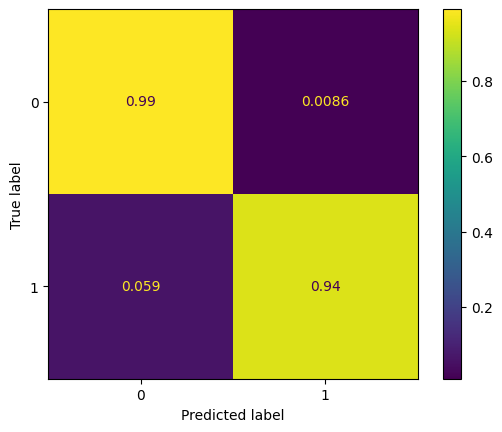

In [56]:
pred_val = cross_val_predict(forest,X_train,Y_train,cv=5,n_jobs=-1)

mat  = confusion_matrix(Y_train, pred_val, normalize='true')
mat

disp = ConfusionMatrixDisplay(confusion_matrix = mat,display_labels =  forest.classes_)
disp.plot()

#### Feature selection

On récupère les features du modèle pour voir lesquels sont plus importantes que d'autre

In [57]:
feature_names = X_train.columns
# feature_importance_df = pd.DataFrame([])
# feature_importance_df.sort_values(by=0,axis=1,ascending=False,inplace=True)

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': forest.feature_importances_})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)
# feature_importance_df
# feature_names

                  Feature  Importance
0               longitude    0.056743
3              haut_tronc    0.050787
1                latitude    0.050616
4              tronc_diam    0.045140
2                haut_tot    0.043960
..                    ...         ...
395  fk_nomtech_MALDOMcox    0.000000
393  fk_nomtech_MALDOMbos    0.000000
460     fk_nomtech_QUECAS    0.000000
375     fk_nomtech_KOEPAN    0.000000
298  fk_nomtech_ACENEGvar    0.000000

[510 rows x 2 columns]


On récupère les x plus importante pour faire un nouveau modele

In [58]:
top_features = feature_importance_df['Feature'][:20].values
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]


In [59]:
X_train_selected
# X_test_selected

,longitude,haut_tronc,latitude,tronc_diam,haut_tot,age_estim,fk_situation_Alignement,fk_nomtech_SORAUC,clc_secteur_Cimetière Sud,fk_situation_Groupe,fk_situation_Isolé,fk_prec_estim,clc_nbr_diag,clc_secteur_Square Churchill,fk_pied_gazon,fk_nomtech_ACEPLA,clc_secteur_Ecole primaire Pierre Laroche,fk_port_semi libre,fk_nomtech_BETPEN,clc_quartier_Quartier du Centre-Ville
0,0.968801,-0.465550,-0.588273,0.087776,0.213100,0.054814,1.000000,0.000000,0.000000,0.0,0.000000,0.357548,-0.279804,0.0,1.000000,0.000000,0.0,1.0,0.0,0.0
1,-1.120770,-0.465550,0.229186,0.172473,0.213100,0.310621,0.000000,0.000000,0.000000,0.0,1.000000,0.357548,-0.279804,0.0,1.000000,0.000000,0.0,1.0,0.0,0.0
2,-0.311987,1.211029,0.028170,0.138594,0.699128,0.822235,1.000000,0.000000,0.000000,0.0,0.000000,0.357548,-0.279804,0.0,1.000000,0.000000,0.0,1.0,0.0,0.0
3,0.216212,-0.465550,0.879192,1.019439,0.375109,0.822235,1.000000,0.000000,0.000000,0.0,0.000000,1.402630,2.334405,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0
4,1.195449,0.093310,-1.048275,-0.420403,-0.596945,0.310621,1.000000,0.000000,0.000000,0.0,0.000000,0.357548,-0.279804,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,0.292390,-0.765657,1.272853,0.663618,0.853144,0.310621,0.000000,0.000000,0.000000,1.0,0.000000,0.357548,-0.279804,0.0,1.000000,0.000000,0.0,1.0,0.0,0.0
7229,-0.054661,5.463335,-0.112115,1.660218,1.988181,2.357076,0.000000,0.000000,0.000000,1.0,0.000000,2.447711,2.334405,0.0,1.000000,0.000000,0.0,1.0,0.0,0.0
7230,1.241180,-0.465550,-0.694385,-1.188539,-0.888906,-0.930450,0.950531,0.950531,1.000000,0.0,0.049469,0.357548,-0.279804,0.0,1.000000,0.000000,0.0,1.0,0.0,0.0
7231,1.034058,-0.242370,-0.977006,-1.148850,-0.856265,-0.764101,1.000000,0.600651,0.600651,0.0,0.000000,0.357548,-0.279804,0.0,0.600651,0.000000,0.0,1.0,0.0,0.0


#### Featured model

Nouveau modèle avec les feature séléctionné

In [60]:
feat_forest = RandomForestClassifier(n_estimators=250,random_state=42,n_jobs=-1)
feat_forest.fit(X_train_selected,Y_train)

RandomForestClassifier(n_estimators=250, n_jobs=-1, random_state=42)

##### Test d'accuary et matrice de confusion

Test de validation

In [61]:
pred = cross_val_score(feat_forest,X_train_selected,Y_train,cv=5,n_jobs=-1)
pred.mean()

0.9784348979765453

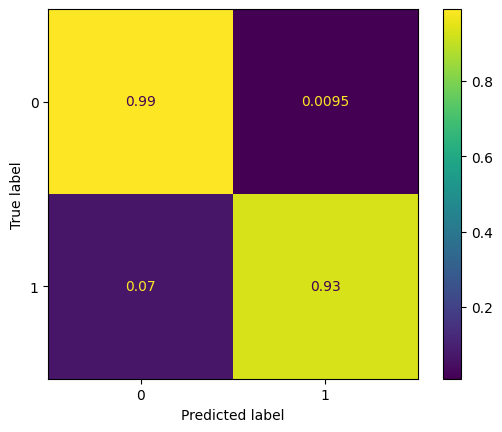

In [62]:
pred_val = cross_val_predict(feat_forest,X_train_selected,Y_train,cv=5,n_jobs=-1)

mat  = confusion_matrix(Y_train, pred_val, normalize='true')
mat

disp = ConfusionMatrixDisplay(confusion_matrix = mat,display_labels =  feat_forest.classes_)
disp.plot()

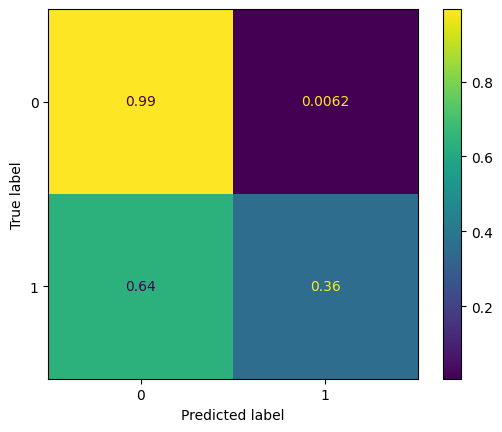

In [63]:
pred_val = feat_forest.predict(X_test_selected)

mat  = confusion_matrix(Y_test, pred_val, normalize='true')
mat

disp = ConfusionMatrixDisplay(confusion_matrix = mat,display_labels =  feat_forest.classes_)
disp.plot()

##### Hyperparametrage

In [ ]:
# print(X_train_selected.shape)
# print(Y_train.shape)

In [64]:
param_grid = { 
    'n_estimators': [i*25 for i in range(1,15)],
    'max_features': ['auto', 'sqrt', 'log2', None],
    # 'max_depth' : [5, 10, 15, None],
    'criterion' :['gini', 'entropy', 'log_loss']
}

In [ ]:
gcv = GridSearchCV(estimator=feat_forest, param_grid=param_grid, cv= 5, n_jobs=-1, scoring='f1')
gcv.fit(X_train_selected, Y_train)
gcv.best_params_

c:\Users\Alexandre\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 75}

In [65]:
#Test nouveau modele
# grid_model = RandomForestClassifier(random_state=42,n_jobs=-1, **gcv.best_params_)
grid_model = RandomForestClassifier(random_state=42,n_jobs=-1, criterion='entropy', n_estimators=75)
grid_model.fit(X_train_selected,Y_train)

pred_val = grid_model.predict(X_test_selected)

mat  = confusion_matrix(Y_test, pred_val, normalize='true')
mat

disp = ConfusionMatrixDisplay(confusion_matrix = mat,display_labels =  feat_forest.classes_)
disp.plot()

InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

# Pickle

Sauvegarde du modèle, encoder utilisé

In [ ]:
dic = {"model":feat_forest,"features":top_features,"scaler":scaler,"hot":hot, "categorielle":categorielle,"numerique":numerique,"binaire":['remarquable']}
pk.dump(dic, open('dic_client_3.pkl', 'wb'))


# categorielle = ["clc_quartier","clc_secteur","fk_stadedev","fk_port","fk_pied","fk_situation","fk_nomtech","villeca","feuillage"]
# numerique = ["longitude","latitude","haut_tot","haut_tronc","tronc_diam","age_estim","fk_prec_estim","clc_nbr_diag"]
# binaire = ["fk_arb_etat","remarquable"]
# revet = ["fk_revetement"]

In [ ]:
# pk.dump(smoted_model, open('smoted_model_client_3.pkl', 'wb'))